# Considerações do projeto

**Id:** identificador único do cliente.<br>
**Gender:** gênero do cliente.<br>
**Age:** idade do cliente.<br>
**Driving License:** 0, o cliente não tem permissão para dirigir e 1, o cliente tem para dirigir ( CNH – Carteira Nacional de Habilitação )<br>
**Region Code:** código da região do cliente.<br>
**Previously Insured:** 0, o cliente não tem seguro de automóvel e 1, o cliente já tem seguro de automóvel.<br>
**Vehicle Age:** idade do veículo.<br>
**Vehicle Damage:** 0, cliente nunca teve seu veículo danificado no passado e 1, cliente já teve seu veículo danificado no passado.<br>
**Anual Premium:** quantidade que o cliente pagou à empresa pelo seguro de saúde anual.<br>
**Policy sales channel:** código anônimo para o canal de contato com o cliente.<br>
**Vintage:** número de dias que o cliente se associou à empresa através da compra do seguro de saúde.<br>
**Response:** 0, o cliente não tem interesse e 1, o cliente tem interesse.

## O Desafio

Nesse contexto, você foi contratado como um consultor de Ciência de Dados para construir um modelo que prediz se o cliente estaria ou não interessado no seguro de automóvel. 

Com a sua solução, o time de vendas espera conseguir priorizar as pessoas com maior interesse no novo produto e assim, otimizar a campanha realizando apenas contatos aos clientes mais propensos a realizar a compra.

Como resultado da sua consultoria, você precisará entregar um relatório contendo algumas análises e respostas às seguintes perguntas:

Principais Insights sobre os atributos mais relevantes de clientes interessados em adquirir um seguro de automóvel.
Qual a porcentagem de clientes interessados em adquirir um seguro de automóvel, o time de vendas conseguirá contatar fazendo 20.000 ligações?
E se a capacidade do time de vendas aumentar para 40.000 ligações, qual a porcentagem de clientes interessados em adquirir um seguro de automóvel o time de vendas conseguirá contatar?
Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel?

## Perguntas

- Principais Insights sobre os atributos mais relevantes de clientes interessados em adquirir um seguro de automóvel.
- Qual a porcentagem de clientes interessados em adquirir um seguro de automóvel, o time de vendas conseguirá contatar fazendo 20.000 ligações?
- E se a capacidade do time de vendas aumentar para 40.000 ligações, qual a porcentagem de clientes interessados em adquirir um seguro de automóvel o time de vendas conseguirá contatar?
- Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel?

# Inicialização

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path

In [3]:
ROOT = os.path.abspath('..')
DATA = os.path.join(ROOT, 'data', 'external')

In [4]:
df = pd.read_csv(os.path.join(DATA, 'train.csv'))

# EDA

## Informações básicas

In [5]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
df.median()

id                      190555.0
Age                         36.0
Driving_License              1.0
Region_Code                 28.0
Previously_Insured           0.0
Annual_Premium           31669.0
Policy_Sales_Channel       133.0
Vintage                    154.0
Response                     0.0
dtype: float64

## Verificando valores nulos

In [9]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

É possível observar que não contém valores nulos, o que é ótimo para o avanço da análise

## Correlação

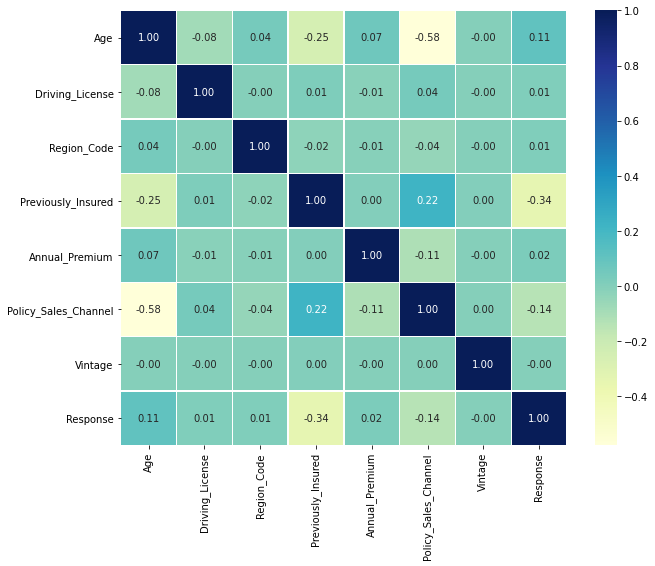

In [10]:
plt.figure(figsize=(10,8))
df_numerical = df.select_dtypes(exclude='object').iloc[:, 1:]
sns.heatmap(data= df_numerical.corr(), cmap='YlGnBu', linewidths=.3, annot=True, fmt=".2f");

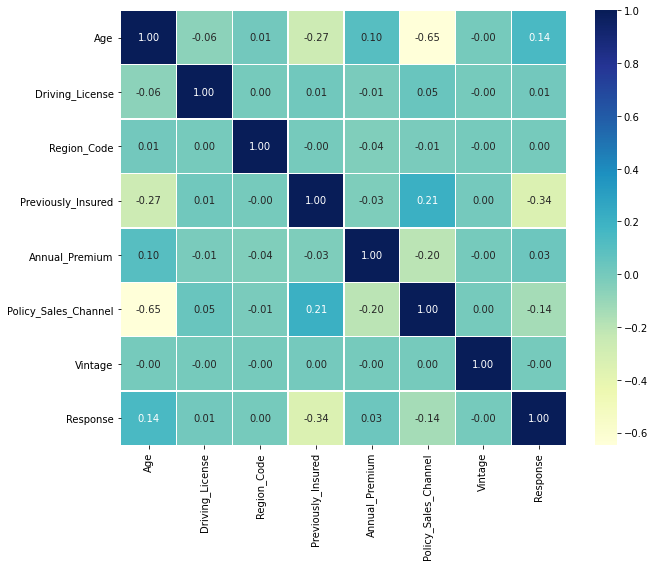

In [11]:
plt.figure(figsize=(10,8))
df_numerical = df.select_dtypes(exclude='object').iloc[:, 1:]
sns.heatmap(data= df_numerical.corr(method='spearman'), cmap='YlGnBu', linewidths=.3, annot=True, fmt=".2f");

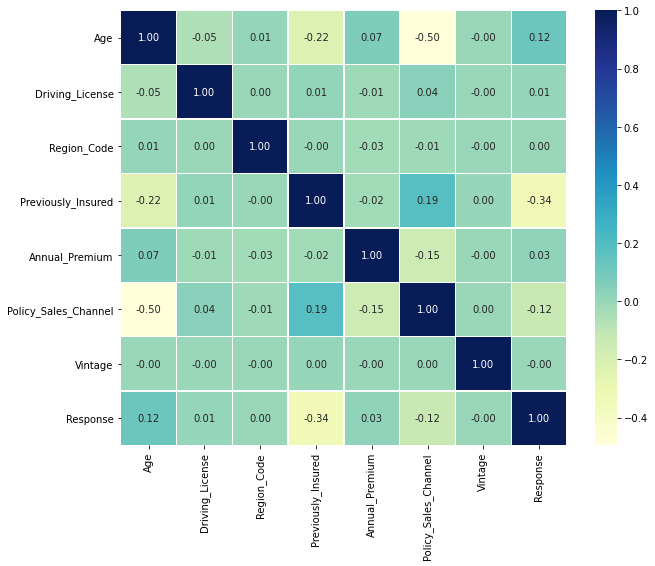

In [12]:
plt.figure(figsize=(10,8))
df_numerical = df.iloc[:, 1:]
sns.heatmap(data= df_numerical.corr(method='kendall'), cmap='YlGnBu', linewidths=.3, annot=True, fmt=".2f");

Estou em dúvida sobre a interpretação da correlação de person em relação a variável Response, verificar material

# Perguntas

## Principais Insights sobre os atributos mais relevantes de clientes interessados em adquirir um seguro de automóvel.

- Distribuição do sexo
- Idade Média
- tem permissão para dirigir?
- tem seguro?
- já teve o veículo danificado no passado?
- distribuição da idade do veiculo
- Quem mais gastou com anual premium por sexo

In [13]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [16]:
df_inte = df[df['Response'] == 1]

Distribuição do sexo

In [17]:
df_inte['Gender'].value_counts()

Male      28525
Female    18185
Name: Gender, dtype: int64

Idade Média e Mediana

In [26]:
print(f"Mediana da idade {df_inte['Age'].median()}")
print(f"Média da idade {df_inte['Age'].mean().round(2)}")

Mediana da idade 43.0
Média da idade 43.44


tem permissão para dirigir?

In [28]:
df_inte['Driving_License'].value_counts()

1    46669
0       41
Name: Driving_License, dtype: int64

- tem seguro?

In [31]:
df_inte['Previously_Insured'].value_counts()

0    46552
1      158
Name: Previously_Insured, dtype: int64

Já teve o veículo danificado no passado?

In [58]:
df_inte.groupby(by=['Vehicle_Damage'])['Gender'].value_counts()

Vehicle_Damage  Gender
No              Male        564
                Female      418
Yes             Male      27961
                Female    17767
Name: Gender, dtype: int64

In [87]:
male_acidente = df_inte.query('Gender == "Male" and Vehicle_Damage == "Yes"')['id'].count()
female_acidente = df_inte.query('Gender == "Female" and Vehicle_Damage == "Yes"')['id'].count()
print(f"Homens que sofreram acidentes {(male_acidente / df_inte[df_inte['Gender'] == 'Male']['id'].count()) * 100}")
print(f"Mulheres que sofreram acidentes {(female_acidente / df_inte[df_inte['Gender'] == 'Female']['id'].count()) * 100}")

Homens que sofreram acidentes 98.022787028922
Mulheres que sofreram acidentes 97.70140225460544


Distribuição da idade do veiculo

In [69]:
df_inte['Vehicle_Age'].value_counts()

1-2 Year     34806
< 1 Year      7202
> 2 Years     4702
Name: Vehicle_Age, dtype: int64

Quem mais gastou com anual premium por sexo

In [79]:
df_inte.groupby(by=['Gender'])['Annual_Premium'].sum()

Gender
Female    571674629.0
Male      904552543.0
Name: Annual_Premium, dtype: float64

In [80]:
df_inte.groupby(by=['Gender'])['Annual_Premium'].sum() / df_inte['Annual_Premium'].sum() * 100

Gender
Female    38.725383
Male      61.274617
Name: Annual_Premium, dtype: float64

Ainda falta resumir este trecho de análise.

## Qual a porcentagem} de clientes interessados em adquirir um seguro de automóvel, o time de vendas conseguirá contatar fazendo 20.000 ligações?


## E se a capacidade do time de vendas aumentar para 40.000 ligações, qual a porcentagem de clientes interessados em adquirir um seguro de automóvel o time de vendas conseguirá contatar?


## Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel?